In [9]:
jsonfs = ['.\\output\\1_keypoints.json', '.\\output\\10_keypoints.json', '.\\output\\11_keypoints.json', '.\\output\\12_keypoints.json', '.\\output\\13_keypoints.json', '.\\output\\2_keypoints.json', '.\\output\\3_keypoints.json', '.\\output\\4_keypoints.json', '.\\output\\5_keypoints.json', '.\\output\\6_keypoints.json', '.\\output\\7_keypoints.json', '.\\output\\8_keypoints.json', '.\\output\\9_keypoints.json']
renderfs = ['.\\output\\1_rendered.png', '.\\output\\10_rendered.png', '.\\output\\11_rendered.png', '.\\output\\12_rendered.png', '.\\output\\13_rendered.png', '.\\output\\2_rendered.png', '.\\output\\3_rendered.png', '.\\output\\4_rendered.png', '.\\output\\5_rendered.png', '.\\output\\6_rendered.png', '.\\output\\7_rendered.png', '.\\output\\8_rendered.png', '.\\output\\9_rendered.png']
fs = ('E:\\Python\\temp\\code38\\1.jpg',
 'E:\\Python\\temp\\code38\\10.png',
 'E:\\Python\\temp\\code38\\11.jpg',
 'E:\\Python\\temp\\code38\\12.jpg',
 'E:\\Python\\temp\\code38\\13.png',
 'E:\\Python\\temp\\code38\\2.jpg',
 'E:\\Python\\temp\\code38\\3.png',
 'E:\\Python\\temp\\code38\\4.jpg',
 'E:\\Python\\temp\\code38\\5.jpg',
 'E:\\Python\\temp\\code38\\6.jpg',
 'E:\\Python\\temp\\code38\\7.jpg',
 'E:\\Python\\temp\\code38\\8.jpg',
 'E:\\Python\\temp\\code38\\9.png')

from importlib import reload
import bodyfeature
reload(bodyfeature)
from bodyfeature import *
from matplotlib import pyplot as plt

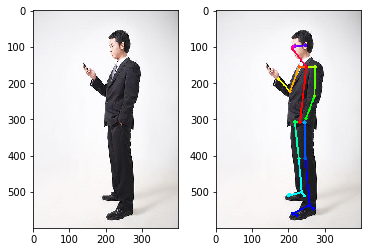

0
stand:True
sit:False
raise:True
lie:False


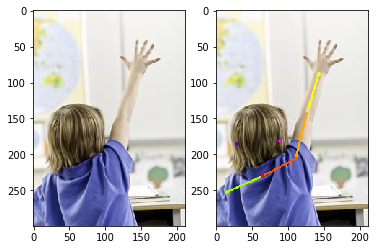

1
stand:False
sit:False
raise:True
lie:False


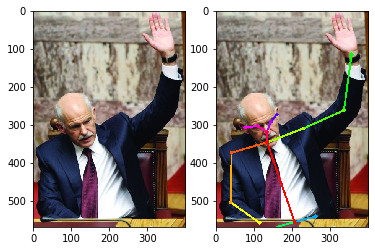

2
stand:False
sit:False
raise:True
lie:False


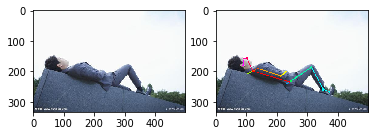

3
stand:False
sit:False
raise:False
lie:True


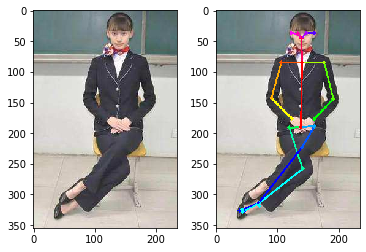

4
stand:False
sit:True
raise:False
lie:False


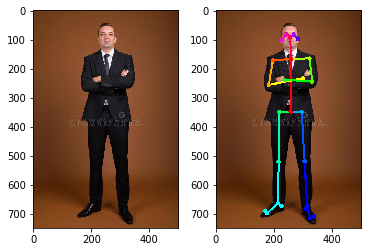

5
stand:True
sit:False
raise:False
lie:False


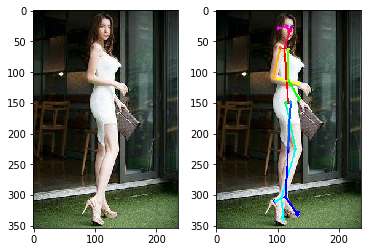

6
stand:True
sit:False
raise:False
lie:False


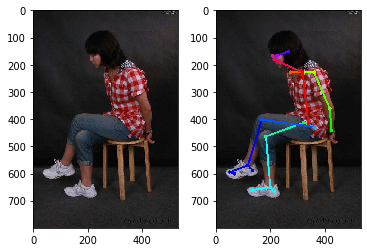

7
stand:False
sit:True
raise:False
lie:False


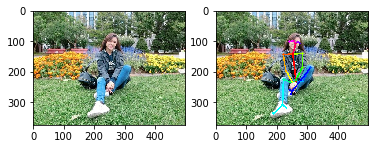

8
stand:False
sit:True
raise:False
lie:False


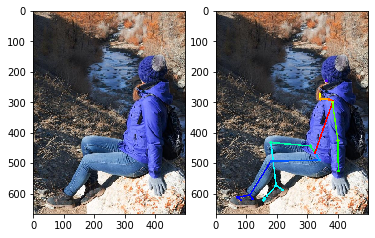

9
stand:False
sit:True
raise:False
lie:False


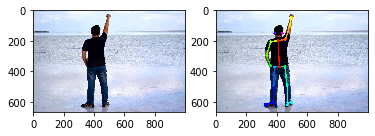

10
stand:True
sit:False
raise:True
lie:False


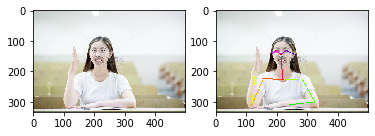

11
stand:False
sit:False
raise:True
lie:False


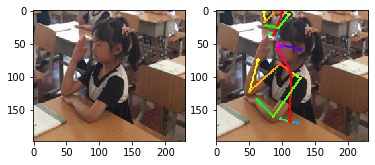

12
stand:False
sit:False
raise:True
lie:False


In [10]:
for i in range(13):
    self = pose = Pose(jsonfs[i])
    def show(f1,f2):
        plt.subplot(1,2,1)
        plt.imshow(plt.imread(f1))
        plt.subplot(1,2,2)
        plt.imshow(plt.imread(f2))
        plt.show()

    show(fs[i],renderfs[i])
    print(i)
    print("stand:{}".format(pose.body.is_stand()))
    print("sit:{}".format(pose.body.is_sit()))
    print("raise:{}".format(pose.body.is_raise()))
    print("lie:{}".format(pose.body.is_lie()))


所有对四肢的判断都是在确保该部份向量有效的情况下计算的
是否有效判断方法：openpose会返回某一点的置信度，构成向量时会用到两个点，要求这两个点的置信度均大于0.2（最大1.0）；此外，以躯干向量长度为标注长度（1->8），要求四肢的长度不能小于躯干向量长度的1/10（一般这种情况都是侧身或者有遮挡，openpose进行了估计，很有可能不准）


判断是否躺下
当前判断标准：判断身体躯干向量（8->1)与水平方向的夹角（小于90°的），如果夹角小于45°则为躺下


判断是否坐下
当前判断逻辑：
    首先判断是否躺下，如果躺下则返回False
    如果没有躺下，则依次判断左右腿的状态。
        根据三角形两边之和大于第三边的原理，判断两腿的向量长度，以及脚踝到胯部的向量长度（11->9和14->12）
            （两条大腿向量为13->12和10->9，小腿向量为13->14和10->11)
            如果大腿和小腿长大于第三边向量长度的某个倍数，则为坐下
                （由于站直时候也是三角形，因此需要超过一定阈值，来确保弯曲程度）
                （用大腿和小腿夹角判断也可以，只是判断的时候用了三角形三边）
        两条腿有一条满足则为坐下的状态
        
判断是否举手

当前判断逻辑：
    分左右手分别判断，有一只手为举起，则返回举手状态
    每只手判断逻辑：判断小臂对应向量（6->7和3->4）与竖直方向夹角是否小于45°，且y轴方向是否向上
        （由于手势没有办法判断的很细，所以第一张看手机也被认为是举手）
        
判断是否站立

当前判断逻辑：分别判断左右腿，有一条满足则为站立
    每条腿判断逻辑：
        两条腿长度比例相差不超过20%（正面坐下情况的排除），
        大腿和小腿夹角超过150°（保证腿伸直），
        每条腿和水平线的距离大于75°（保证接近垂直）